# Multi-Class Image Classification of Rice Types

In this notebook, we tackle the task of classifying images of rice into five distinct classes. Each class represents a different type of rice. Our dataset consists of 75,000 images, with 15,000 images for each rice type.

We approach this multi-class classification problem using Convolutional Neural Networks (CNNs), a type of deep learning model particularly effective for image analysis tasks. Our model architecture consists of three convolutional layers, each followed by a max-pooling layer to reduce dimensionality. After flattening the output of the convolutional layers, we use a fully connected layer, apply dropout for regularization, and finally use a softmax activation function in the output layer to obtain class probabilities.

Throughout the notebook, we monitor our model’s performance, visualize the results.


In [57]:
#Import libraries
import os
import shutil
import numpy as np

# Define directories
base_dir = "C:/Users/mikhe/OneDrive/Desktop/Rice_Image_Dataset/Rice_Image_Dataset"
train_dir = "C:/Users/mikhe/OneDrive/Desktop/train"
val_dir = "C:/Users/mikhe/OneDrive/Desktop/valid"
test_dir = "C:/Users/mikhe/OneDrive/Desktop/test"

# Create train, validation and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop over each class directory
for class_dir in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, class_dir)):
        # Create corresponding directories in train, validation and test directories
        os.makedirs(os.path.join(train_dir, class_dir), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_dir), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_dir), exist_ok=True)

        # List all files in class directory
        files = os.listdir(os.path.join(base_dir, class_dir))

        # Randomly shuffle the files
        np.random.shuffle(files)

        # Split files into 80% train, 10% validation and 10% test
        train_files = files[:int(len(files)*0.8)]
        val_files = files[int(len(files)*0.8):int(len(files)*0.9)]
        test_files = files[int(len(files)*0.9):]

        # Function to copy files to target directory
        def copy_files(files, target_dir):
            for file in files:
                shutil.copy(os.path.join(base_dir, class_dir, file), os.path.join(target_dir, class_dir, file))

        # Copy files to train, validation and test directories
        copy_files(train_files, train_dir)
        copy_files(val_files, val_dir)
        copy_files(test_files, test_dir)


Creating train and validation generators:

In [58]:
#Import libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

# dimensions of our images.
img_width, img_height = 150, 150

nb_train_samples = 60000
nb_validation_samples = 7500
epochs = 6
batch_size = 64


# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
test_datagen = ImageDataGenerator(rescale=1. / 255)
#creaing generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')




Found 60000 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


Visualizing each type of rice

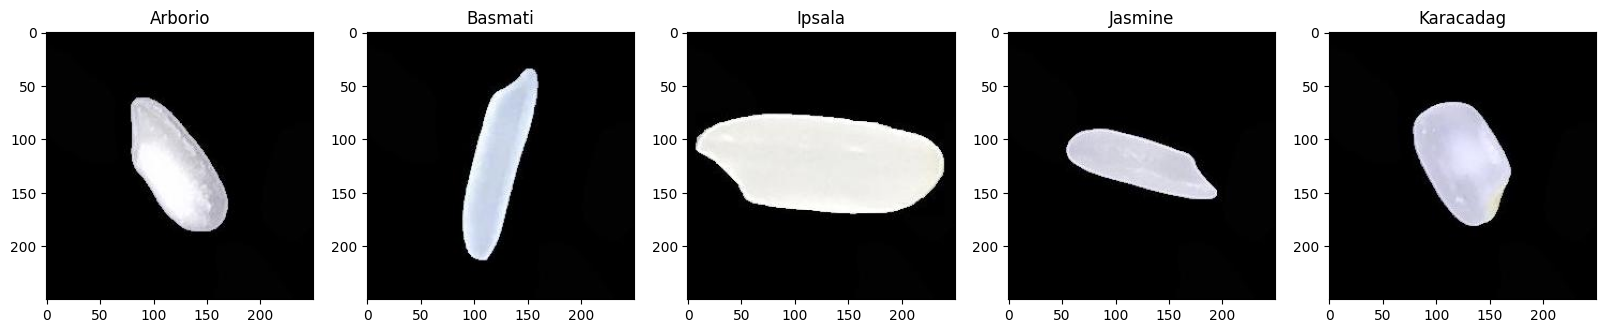

In [59]:
import matplotlib.pyplot as plt

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Create a figure to display the images
fig, ax = plt.subplots(1, len(class_labels), figsize=(20, 20))

# For each class label
for i, class_label in enumerate(class_labels):
    # Get the directory for this class
    class_dir = os.path.join(train_data_dir, class_label)
    
    # Get the list of all files in this directory
    files = os.listdir(class_dir)
    
    # Get the path to the first file in this directory
    img_path = os.path.join(class_dir, files[0])
    
    # Read the image and display it
    img = plt.imread(img_path)
    ax[i].imshow(img)
    ax[i].set_title(class_label)

plt.show()


Now, let us create model and compile it

In [38]:
import tensorflow as tf

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Output layer for 5 classes



model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
       optimizer='adam',
       metrics=['accuracy'])


Here is model summery:

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_29 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_30 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                

In [40]:
#Fitting our model on the training set
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/6
937/937 [==============================] - 476s 507ms/step - loss: 0.3613 - accuracy: 0.8565 - val_loss: 0.0452 - val_accuracy: 0.9880
Epoch 2/6
937/937 [==============================] - 499s 533ms/step - loss: 0.1260 - accuracy: 0.9589 - val_loss: 0.0412 - val_accuracy: 0.9870
Epoch 3/6
937/937 [==============================] - 537s 574ms/step - loss: 0.0725 - accuracy: 0.9788 - val_loss: 0.0198 - val_accuracy: 0.9937
Epoch 4/6
937/937 [==============================] - 518s 553ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0198 - val_accuracy: 0.9945
Epoch 5/6
937/937 [==============================] - 561s 599ms/step - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0186 - val_accuracy: 0.9944
Epoch 6/6
937/937 [==============================] - 581s 620ms/step - loss: 0.0488 - accuracy: 0.9852 - val_loss: 0.0329 - val_accuracy: 0.9908


Saving the model:

In [56]:
model.save('rice_classification.keras')

Now let us visualize results:

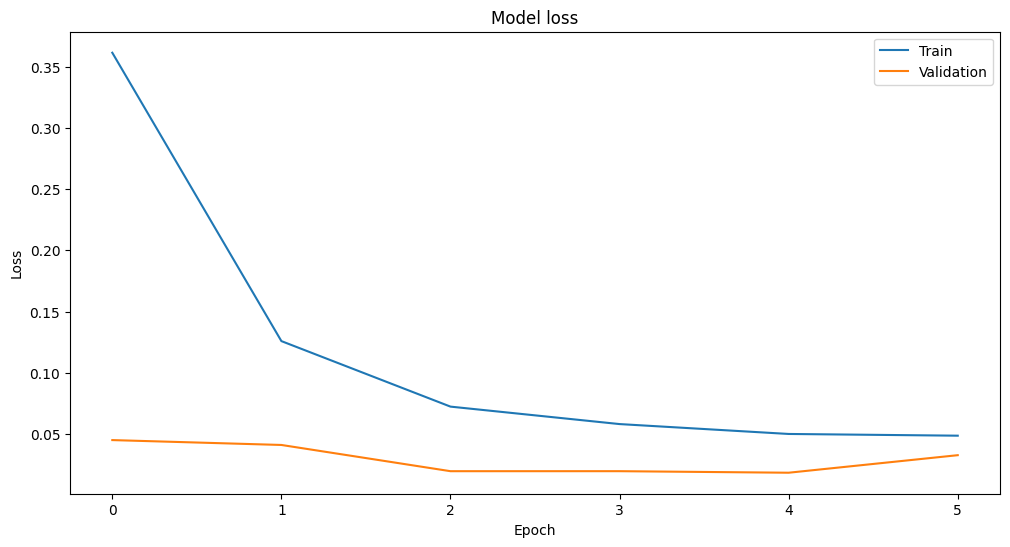

In [60]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


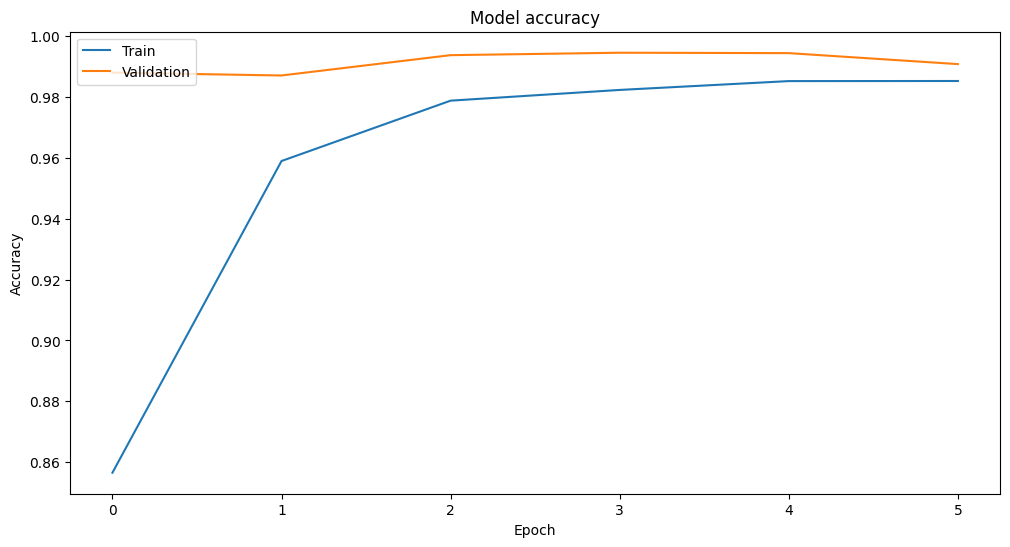

In [50]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


As we see from the above graphs, model looks promising, so let us evaluate its performance on the test set:

In [61]:
#Creating test generator
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Found 7500 images belonging to 5 classes.
118/118 [==============================] - 26s 221ms/step - loss: 0.0309 - accuracy: 0.9907
Test accuracy: 0.9906666874885559


Fortunately, we got 99.07% accuracy on the test set, indicating that it works well!
Now, let us randomly choose 20 images and see how model classifies them.

1/1 [==============================] - 0s 81ms/step


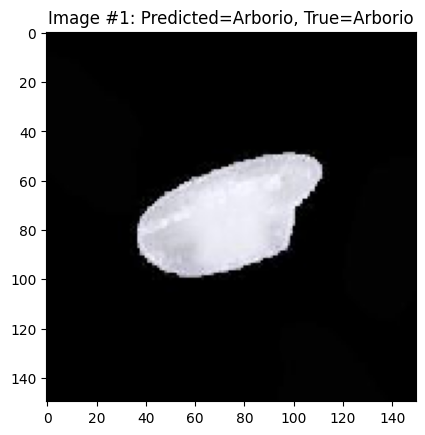

1/1 [==============================] - 0s 60ms/step


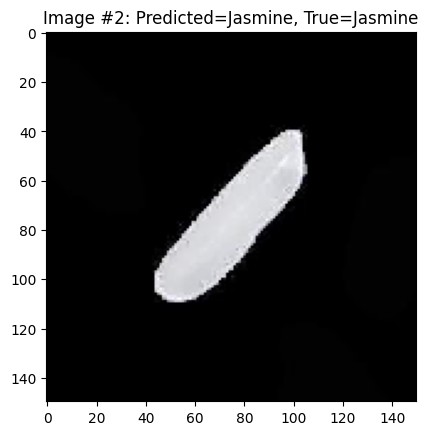

1/1 [==============================] - 0s 72ms/step


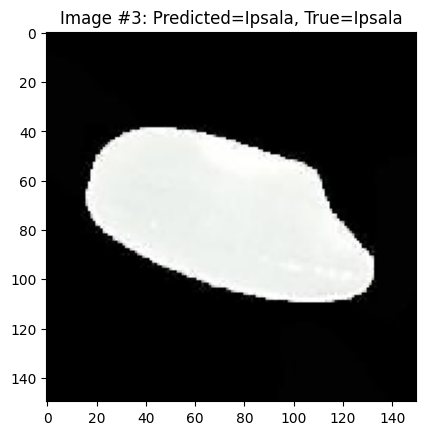

1/1 [==============================] - 0s 66ms/step


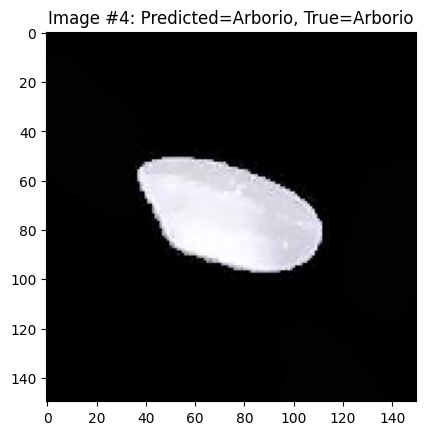

1/1 [==============================] - 0s 69ms/step


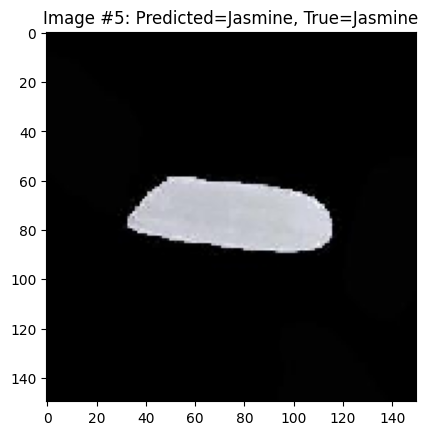

1/1 [==============================] - 0s 73ms/step


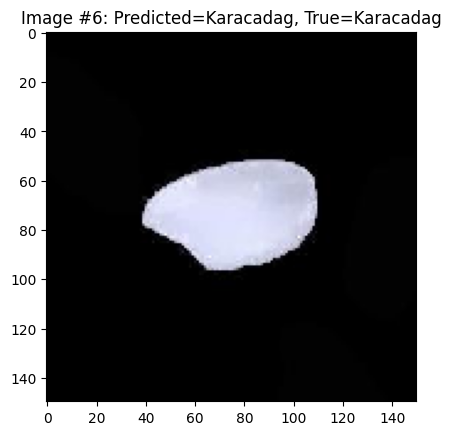

1/1 [==============================] - 0s 73ms/step


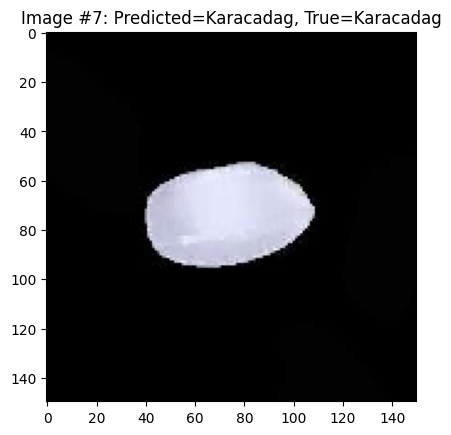

1/1 [==============================] - 0s 76ms/step


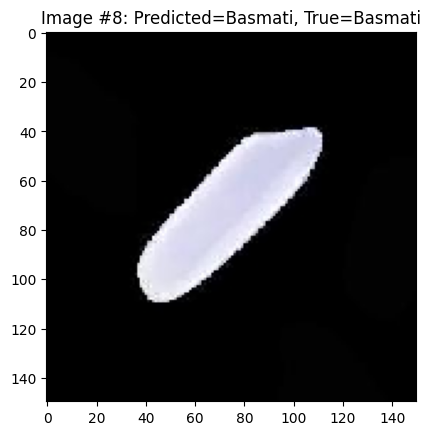

1/1 [==============================] - 0s 87ms/step


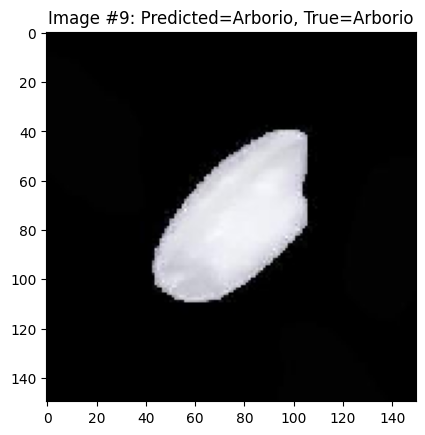

1/1 [==============================] - 0s 57ms/step


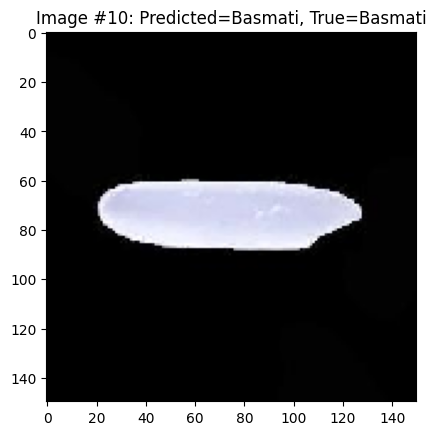

1/1 [==============================] - 0s 76ms/step


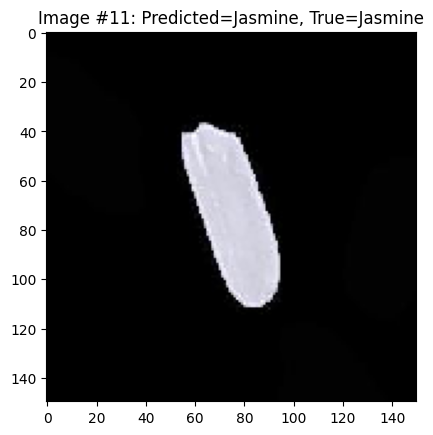

1/1 [==============================] - 0s 73ms/step


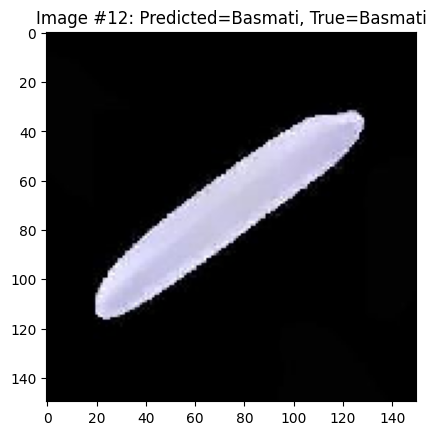

1/1 [==============================] - 0s 33ms/step


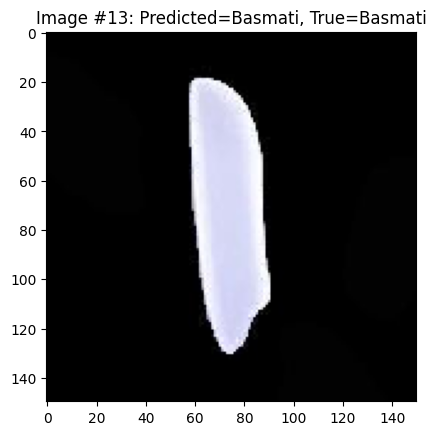

1/1 [==============================] - 0s 36ms/step


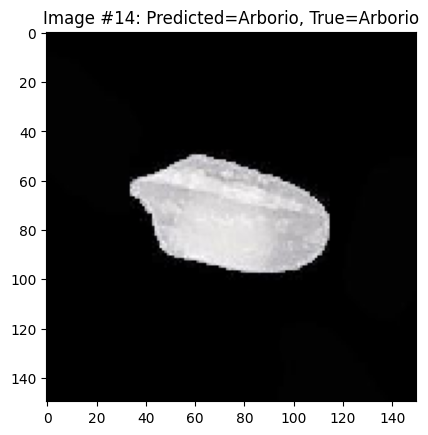

1/1 [==============================] - 0s 39ms/step


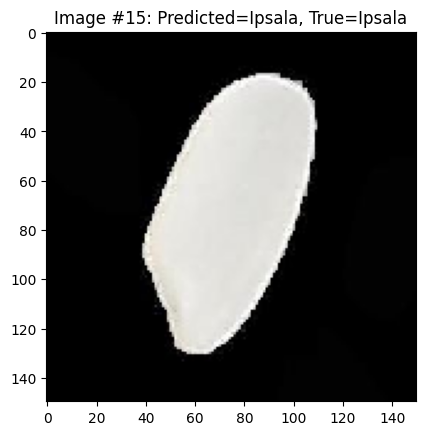

1/1 [==============================] - 0s 53ms/step


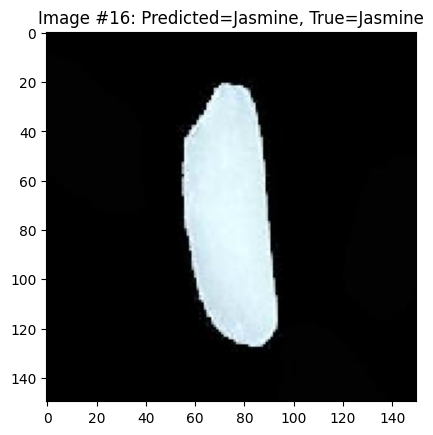

1/1 [==============================] - 0s 36ms/step


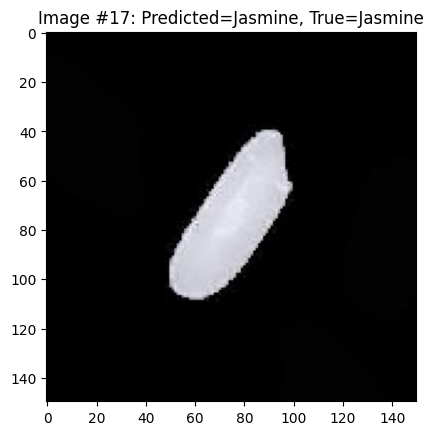

1/1 [==============================] - 0s 76ms/step


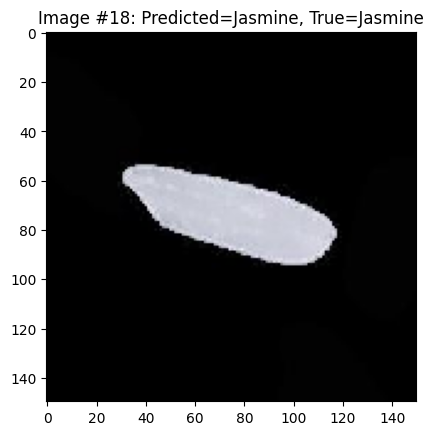

1/1 [==============================] - 0s 73ms/step


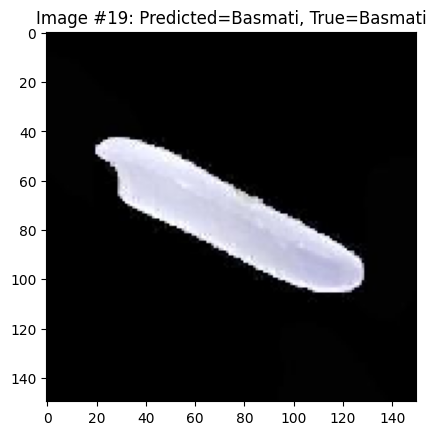

1/1 [==============================] - 0s 68ms/step


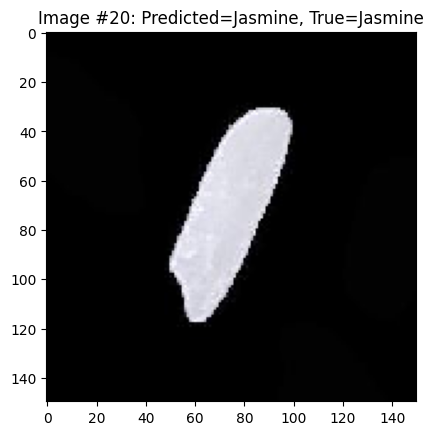

In [62]:
import random
from keras.preprocessing import image

# Define test directory and class labels
class_labels = list(train_generator.class_indices.keys())

# Get a list of all images in the test directory
all_images = []
for class_label in class_labels:
    class_dir = os.path.join(test_data_dir, class_label)
    class_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
    all_images.extend(class_images)

# Randomly select 20 images
selected_images = random.sample(all_images, 20)

# For each selected image
for i, img_path in enumerate(selected_images):
    # Load image and resize it to match model's expected input size
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.  # Model was trained on inputs scaled to [0, 1]

    # Predict the class
    prediction = model.predict(img_tensor)
    predicted_class = class_labels[np.argmax(prediction)]

    # Get the true class
    true_class = os.path.basename(os.path.dirname(img_path))

    # Display the image and its predicted and true classes
    plt.imshow(img)
    plt.title(f"Image #{i+1}: Predicted={predicted_class}, True={true_class}")
    plt.show()


Fortunately, model correctly classified all randomly chosen images from the test set, futher indicating that it works well.

Thank you for following along!